In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load Data 
books_df = pd.read_csv("/Users/grace/Documents/Recommender System/Data/books.csv")
ratings_df = pd.read_csv("/Users/grace/Documents/Recommender System/Data/ratings.csv")

In [6]:
#Extract relevant columns from books_df
book_cols = ["book_id", "title", "authors", "language_code"]
books_df = books_df[book_cols]


In [9]:
books_df.language_code.value_counts()

eng      6341
en-US    2070
en-GB     257
ara        64
en-CA      58
fre        25
ind        21
spa        20
ger        13
per         7
jpn         7
pol         6
por         6
en          4
dan         3
nor         3
ita         2
fil         2
rum         1
vie         1
nl          1
tur         1
swe         1
rus         1
mul         1
Name: language_code, dtype: int64

While the books.csv data set primarily appears to contain most books in English there are some in other languages

In [13]:
#language codes for english books
eng_vals = ["eng", "en-US", "en-GB", "en-CA", "en"]

print("Number of English Books: "+ str(len(books_df[books_df["language_code"].isin(eng_vals)])))

print("Number of Non-English Books: "+ str(len(books_df[~books_df["language_code"].isin(eng_vals)])))


Number of English Books: 8730
Number of Non-English Books: 1084


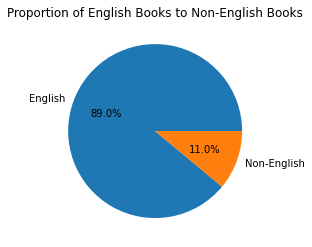

In [14]:
#Plot A Pie Chart That Highlights the Difference In Ratios Between English and Non-English Books
labels = ["English", "Non-English"]
data = [len(books_df[books_df["language_code"].isin(eng_vals)]), len(books_df[~books_df["language_code"].isin(eng_vals)])]

plt.pie(data, labels=labels, autopct='%1.1f%%')
plt.title("Proportion of English Books to Non-English Books")
plt.show()


In [10]:
#As I only want book recommendations that are in English, I will only extract books that are in English from #books_df

eng_books = books_df[books_df["language_code"].isin(eng_vals)]
na_books = books_df[books_df['language_code'].isna()]

books_df = eng_books.append(na_books)

In [4]:
#Merge books_df with ratings_df
data = books_df.merge(ratings_df, on = "book_id", how='left')

In [6]:
data_cols = ["user_id","book_id", "rating"]

df = data[data_cols]

In [7]:
df

,user_id,book_id,rating
0,2886,1,5
1,6158,1,5
2,3991,1,4
3,5281,1,5
4,5721,1,5
...,...,...,...
5916161,35336,10000,4
5916162,17999,10000,3
5916163,49007,10000,4
5916164,43319,10000,5


In [ ]:
df.to_csv("/Users/grace/Documents/Recommender System/Data/CleanedData.csv")